# Datacamp tutorial on Jupyter notebooks

Some exercises and tries to get some code to work in an `.ipynb` using `numpy`, `pandas` and `scikit_learn`

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import `datasets` from `sklearn`
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Import `Isomap()`
from sklearn.manifold import Isomap
from sklearn import cluster
from sklearn import svm
from sklearn import metrics


### Use NumPy to generate placeholder arrays

In [3]:
first_data = np.array([[1,2,3], [4,5,6]], dtype = int)
print('first array with detailed information on numpy attributes')
print(first_data)
print(first_data.data) #memory address of first byte in array
print(first_data.shape) #shape
print(first_data.dtype) #data type: kind of elements
print(first_data.strides) #strides: number of bytes to be skipped in memory for next element

first array with detailed information on numpy attributes
[[1 2 3]
 [4 5 6]]
(2, 3)
int32
(12, 4)


In [4]:
print('2nd array')
array2 = np.array([[1,2,3,4], [5,6,7,8]], dtype = np.int)
print(array2)

2nd array
[[1 2 3 4]
 [5 6 7 8]]


In [5]:
print('quick and simple arrays')
print('ones: ', '\n', 
      np.ones((3,4)), '\n',
      'zeros: ', '\n', 
      np.zeros((2,3,4), dtype = np.int16), '\n',
      'random: ', '\n', 
      np.random.random((2,2)), '\n', 
      'empty: ', '\n', 
      np.empty((3,2)), '\n', 
      'full: ', '\n', 
      np.full((2,2),7), '\n', 
      'evenly-spaced values with specified step value: ', '\n', 
      np.arange(10,30,5), '\n', 
      'evenly-spaced values with specified number of samples: ', '\n', 
      np.linspace(0,2,9))

quick and simple arrays
ones:  
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 
 zeros:  
 [[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]] 
 random:  
 [[0.762516   0.44607869]
 [0.7342746  0.40272176]] 
 empty:  
 [[0. 0.]
 [0. 0.]
 [0. 0.]] 
 full:  
 [[7 7]
 [7 7]] 
 evenly-spaced values with specified step value:  
 [10 15 20 25] 
 evenly-spaced values with specified number of samples:  
 [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


In [6]:
print('identity array and matrix')
print(np.eye(3,4), '\n', 
     np.identity(3))

identity array and matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Import data from a file in a numpy array

In [7]:
x, y, z = np.loadtxt('data.txt',
                    skiprows = 1,
                    unpack = True,
                    #delimeter = , 
                    #dtype = ,
                    )
print('data in separate arrays:', '\n',
      x, y, z)
import_array = np.genfromtxt('data.txt',
                            skip_header = 1,
                            #filling_values = -999,
                            #missing_values = ...,
                            )
print('\n','data in one array','\n',import_array)

data in separate arrays: 
 [0.2536 0.4839 0.1292 0.1781 0.6253] [0.1008 0.4536 0.6875 0.3049 0.3486] [0.3857 0.3561 0.5929 0.8928 0.8791]

 data in one array 
 [[0.2536 0.1008 0.3857]
 [0.4839 0.4536 0.3561]
 [0.1292 0.6875 0.5929]
 [0.1781 0.3049 0.8928]
 [0.6253 0.3486 0.8791]]


In [8]:
#print('save NumPy arrays to text files')
#np.savetxt('out.put', np.arange(0.0, 5.0, 1.0), delimiter=',')
#save() for binary file in .npy format
#savez(), savez_compressed() for (un)compressed .npz archive

In [9]:
print('more details on imported data:')
print('#dimensions:', import_array.ndim)
print('#elements:', import_array.size)
print('memory layout:', '\n', import_array.flags)
print('length of one array element in bytes:', import_array.itemsize)
print('total consumed bytes:', import_array.nbytes)
print('length of array:', len(import_array))

print(np.array([
    ['\#dimensions:', import_array.ndim],
    ['#elements:', import_array.size]]))

more details on imported data:
#dimensions: 2
#elements: 15
memory layout: 
   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
length of one array element in bytes: 8
total consumed bytes: 120
length of array: 5
[['\\#dimensions:' '2']
 ['#elements:' '15']]


In [10]:
#change data type of arrays
import_array_int = np.multiply(import_array, 10).astype(int)
print(import_array_int)

[[2 1 3]
 [4 4 3]
 [1 6 5]
 [1 3 8]
 [6 3 8]]


In [11]:
x = np.ones((3,4))
print(x.shape)
y = np.random.random((3,4))
print(y.shape)
print(x + y)

(3, 4)
(3, 4)
[[1.8200325  1.95007037 1.53662355 1.16159346]
 [1.8142192  1.83387187 1.67890535 1.94971147]
 [1.31216931 1.87009059 1.88212737 1.84582427]]


In [12]:
z = np.arange(4) # gives 1D array [0 1 2 3]
print(z.shape)
print(x - z)

(4,)
[[ 1.  0. -1. -2.]
 [ 1.  0. -1. -2.]
 [ 1.  0. -1. -2.]]


Useful NumPy array operations: `np.add()`, `np.subtract()`, `np.multiply()`, `np.divide()` and `np.remainder()`.

Other aggregate functions: `a.sum()`, `a.min()`, `a.mean()`, etc.
You can also use `==`, `<` and `>` operators to compare array elements.
To compare entire arrays: `np.array_equal()`.
Logical operations: `np.logical_or()`, `np.logical_not()` and `np.logical_and()`.

### Subset, slice and index arrays
Similar to performing operations on Python lists.

In [13]:
my_array = np.array([[1,2,3,4], [5,6,7,8]], dtype=np.int64)
print('my_array', '\n', my_array)
my_2d_array = np.multiply(np.random.random((4,4)),10).astype(int)
print('my_2d_array','\n', my_2d_array)
my_3d_array = np.multiply(np.random.random((3,3,3)),100).astype(int)
print('my_3d_array','\n', my_3d_array)
# Select the element at the 1st index
print('1st index - starting at 0!:\n',my_array[1]) #Python starts at 0!

# Select the element at row 1 column 2
print('element at row 1 column 2 [1][2]:\n',my_2d_array[1][2])

# Select the element at row 1 column 2
print('element at row 1 column 2 [1,2]:\n',my_2d_array[1,2])

# Select the element of list 1 at row 1, column 2
print('element of list 1 at row 1, column 2 [1,1,2]:\n',my_3d_array[1,1,2])

my_array 
 [[1 2 3 4]
 [5 6 7 8]]
my_2d_array 
 [[4 2 7 0]
 [8 6 4 1]
 [8 3 1 3]
 [7 3 3 8]]
my_3d_array 
 [[[55 78  9]
  [89 94 22]
  [65 52 75]]

 [[42 90 88]
  [97  7  9]
  [ 5 28 14]]

 [[72 91 31]
  [69 22 51]
  [13 55  0]]]
1st index - starting at 0!:
 [5 6 7 8]
element at row 1 column 2 [1][2]:
 4
element at row 1 column 2 [1,2]:
 4
element of list 1 at row 1, column 2 [1,1,2]:
 9


In [14]:
# Select items at index 0 and 1
print(my_array[0:2])

# Select items at row 0 and 1, column 1
print(my_2d_array[0:2,1])

# Select all items at row 1 of all lists
print(my_3d_array[:,1,:])

[[1 2 3 4]
 [5 6 7 8]]
[2 6]
[[89 94 22]
 [97  7  9]
 [69 22 51]]


In [15]:
# Try out a simple example
print(my_array[my_array<2])

# Specify a condition
bigger_than_3 = (my_3d_array >= 3)
# Use the condition to index our 3d array
print(my_3d_array[bigger_than_3])

[1]
[55 78  9 89 94 22 65 52 75 42 90 88 97  7  9  5 28 14 72 91 31 69 22 51
 13 55]


### More manipulation

In [16]:
print(my_2d_array)
print(np.transpose(my_2d_array)) #or use my_2d_array.T

[[4 2 7 0]
 [8 6 4 1]
 [8 3 1 3]
 [7 3 3 8]]
[[4 8 8 7]
 [2 6 3 3]
 [7 4 1 3]
 [0 1 3 8]]


In [17]:
print(x.shape)
x_resized1 = np.resize(x, (6,4))
print(x_resized1)


(3, 4)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [18]:
print(x.size) #stick to 12 elements when reshaping!
print(x.reshape((2,6)))
z = x.ravel() # flatten x
print(z)

12
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
new_array = np.append(my_array, [7,8,9,10])
print(new_array)

new_2d_array = np.append(my_2d_array, [[7],[8],[9],[10]], axis=1) #axis=1 indicates columns
print(new_2d_array)

[ 1  2  3  4  5  6  7  8  7  8  9 10]
[[ 4  2  7  0  7]
 [ 8  6  4  1  8]
 [ 8  3  1  3  9]
 [ 7  3  3  8 10]]


In [20]:
print(np.insert(my_array, 1, 5), #insert 5 at index 1
      '\n',
      np.delete(my_array,[1])) #delete value at index 1

[1 5 2 3 4 5 6 7 8] 
 [1 3 4 5 6 7 8]


### Visualizing NumPy arrays

In [21]:
# Initialize your array
my_3d_array = np.array([[[1,2,3,4], [5,6,7,8]], [[1,2,3,4], [9,10,11,12]]], dtype=np.int64)

# Pass the array to `np.histogram()`
print(np.histogram(my_3d_array))

# Specify the number of bins
print(np.histogram(my_3d_array, bins=range(0,13)))

(array([4, 2, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int64), array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]))
(array([0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))


More info on histogram arguments [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html)

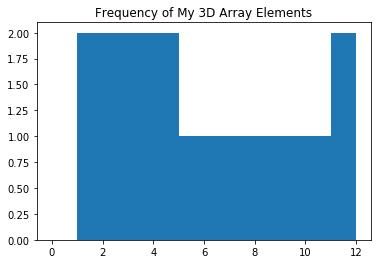

In [22]:
plt.hist(my_3d_array.ravel(), bins = range(0,13))
plt.title('Frequency of My 3D Array Elements')
plt.show()

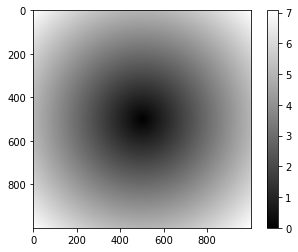

In [23]:
#or with meshgrid
# Create an array
points = np.arange(-5, 5, 0.01)

# Make a meshgrid
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)

# Display the image on the axes
plt.imshow(z, cmap=plt.cm.gray)

# Draw a color bar
plt.colorbar()

# Show the plot
plt.show()

## Using Pandas
Definition and relation to NumPy: a Pandas Series is a 1D labelled NumPy array, a Pandas DataFrame is a 2D labelled array whose columns are Series.

In [24]:
print('Imported data now displayed using pandas')
df = pd.DataFrame(import_array, columns = ['Value1','Value2','Value3'])
df

Imported data now displayed using pandas


,Value1,Value2,Value3
0,0.2536,0.1008,0.3857
1,0.4839,0.4536,0.3561
2,0.1292,0.6875,0.5929
3,0.1781,0.3049,0.8928
4,0.6253,0.3486,0.8791


In [25]:
print('type:', type(df),'\n',
      'shape:',df.shape,'\n',
      'column labels:',df.columns,'\n',
     'index:',df.index,'\n',
     'type of index:',type(df.index))

type: <class 'pandas.core.frame.DataFrame'> 
 shape: (5, 3) 
 column labels: Index(['Value1', 'Value2', 'Value3'], dtype='object') 
 index: RangeIndex(start=0, stop=5, step=1) 
 type of index: <class 'pandas.core.indexes.range.RangeIndex'>


In [26]:
#slice pandas df
df.iloc[:3,:]

,Value1,Value2,Value3
0,0.2536,0.1008,0.3857
1,0.4839,0.4536,0.3561
2,0.1292,0.6875,0.5929


In [27]:
df.iloc[-2:,2:3]

,Value3
3,0.8928
4,0.8791


In [28]:
df.loc[:,'Value1']

0    0.2536
1    0.4839
2    0.1292
3    0.1781
4    0.6253
Name: Value1, dtype: float64

In [29]:
df.loc[[0,3]]

,Value1,Value2,Value3
0,0.2536,0.1008,0.3857
3,0.1781,0.3049,0.8928


In [30]:
df.head(2)

,Value1,Value2,Value3
0,0.2536,0.1008,0.3857
1,0.4839,0.4536,0.3561


In [31]:
df.tail(1)

,Value1,Value2,Value3
4,0.6253,0.3486,0.8791


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
Value1    5 non-null float64
Value2    5 non-null float64
Value3    5 non-null float64
dtypes: float64(3)
memory usage: 200.0 bytes


In [33]:
#df.iloc[::3, -1] = np.nan #slice consisting of every third row (starting from zero) in the last column

In [34]:
print(type(df['Value3']),'\n',
          df['Value3'].head())

<class 'pandas.core.series.Series'> 
 0    0.3857
1    0.3561
2    0.5929
3    0.8928
4    0.8791
Name: Value3, dtype: float64


In [35]:
type(df['Value3'].values) #.values returns a numpy array

numpy.ndarray

### Create DataFrames from CSV files or Python dictionaries

In [36]:
# data = pd.read_csv('datasets/data.csv', index_col=0)

# dict (1)
data_dict = {'weekday': ['Sun','Sun','Mon','Mon'],
       'city': ['Austin','Dallas','Austin','Dallas'],
       'visitors': [139, 237, 629, 456],
       'signups': [7, 12,3, 5]}
users1 = pd.DataFrame(data_dict)

# dict (2)
cities = ['Austin','Dallas','Austin','Dallas']
visitors = [139, 237, 629, 456]
signups = [7, 12, 3, 5]
weekdays = ['Sun','Sun','Mon','Mon']
list_labels = ['city','visitors','signups','weekday']
list_cols = [cities, visitors, signups, weekdays] # a list of lists
zipped = list(zip(list_labels, list_cols))
print(zipped)

data_zipped = dict(zipped)
users2 = pd.DataFrame(data_zipped)
print(users2)

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('visitors', [139, 237, 629, 456]), ('signups', [7, 12, 3, 5]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]
     city  visitors  signups weekday
0  Austin       139        7     Sun
1  Dallas       237       12     Sun
2  Austin       629        3     Mon
3  Dallas       456        5     Mon


In [37]:
#add new column by broadcasting
users2['fees'] = 0
print(users2)

     city  visitors  signups weekday  fees
0  Austin       139        7     Sun     0
1  Dallas       237       12     Sun     0
2  Austin       629        3     Mon     0
3  Dallas       456        5     Mon     0


### Import from CSV files

### plotting series using pandas

<class 'pandas.core.series.Series'>


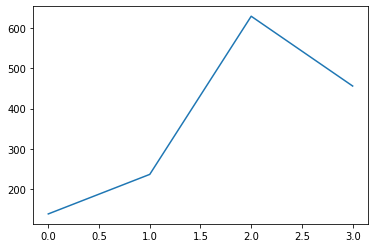

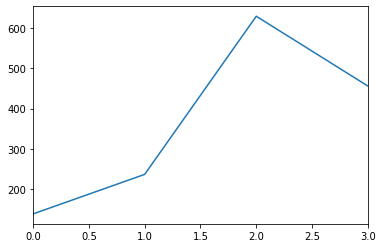

In [38]:
#now using pandas directly
visitors_series = users2['visitors'] 
#if this had date_time as index, x-axis would be automatically formatted as date time / year
print(type(visitors_series))
plt.plot(visitors_series)
plt.show()
visitors_series.plot() #more formatting
plt.show()

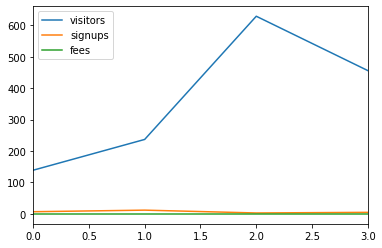

In [39]:
#plt.plot(users2)
#plt.show()
users2.plot()
#plt.yscale('log') #logarithmic scale on vertical axis
plt.show()

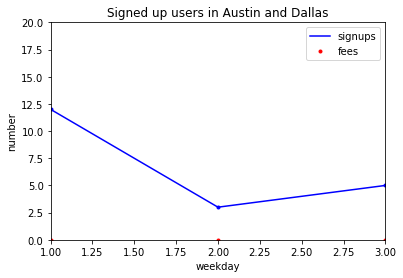

In [40]:
users2['signups'].plot(color='b', style='.-', legend=True)
users2['fees'].plot(color='r', style='.', legend=True)
plt.axis((1,3, 0, 20)) #zoom in
plt.xlabel('weekday')
plt.ylabel('number')
plt.title('Signed up users in Austin and Dallas')
plt.show()

## Machine learning with Python - scikit-learn tutorial
matplotlib and PCA, preprocess data with normalization and split data into training and test sets, use KMeans algorithm as unsupervised model and fit, predict and validate. Bonus: Support Vector Machines as other model.

### Load dataset

In [41]:
# Load in the `digits` data from sklearn datasets module
digits = datasets.load_digits()

# Print the `digits` data 
#print(digits)

### Explore your data
EDA! \newline
`scikit-learn` datasets already contain a lot of information

In [42]:
# Get the keys of the `digits` data
print(digits.keys())

# Print out the data
print(digits.data)

# Print out the target values
print(digits.target)

print(digits.target_names)

# Print out the description of the `digits` data
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by N

In [43]:
# Isolate the `digits` data
digits_data = digits.data

# Inspect the shape
print(digits_data.shape) #1797 samples, 64 features

# Isolate the target values with `target`
digits_target = digits.target

# Inspect the shape
print(digits_target.shape) #1797

# Print the number of unique labels
number_digits = len(np.unique(digits.target))
print(number_digits) #10 unique values

# Isolate the `images`
digits_images = digits.images

# Inspect the shape
print(digits_images.shape) #1797 instances, 8x8 pixels big


(1797, 64)
(1797,)
10
(1797, 8, 8)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### visually check data

In [44]:
print(digits.images.reshape((1797, 64)))
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


With the `numpy` method `all()`, you test whether all array elements along a given axis evaluate to `True`. In this case, you evaluate if it’s true that the reshaped images array equals `digits.data`. You’ll see that the result will be `True` in this case.

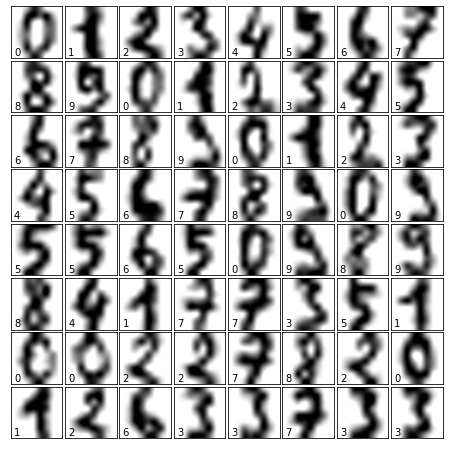

In [49]:
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6)) #blank canvas of 6x6 inches

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) #layout adjustment for all subplots

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='spline16') #colormap is binary with an interpolation method 
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

#### Now with PCA
PCA is a dimensionality reduction technique: The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables.
In short, it’s a linear transformation method that yields the directions (principal components) that maximize the variance of the data. Remember that the variance indicates how far a set of data points lie apart.

In [56]:
# Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2, svd_solver='randomized')

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25946847  21.27488245]
 [  7.95760362 -20.76870665]
 [  6.99192712  -9.95598333]
 ...
 [ 10.80129381  -6.96024125]
 [ -4.87208731  12.4239709 ]
 [ -0.34437323   6.36556614]]
[[ -1.25946378  21.27487968]
 [  7.95761352 -20.76869957]
 [  6.99191752  -9.95597831]
 ...
 [ 10.80127957  -6.96024441]
 [ -4.87210611  12.42396864]
 [ -0.34439198   6.36554919]]


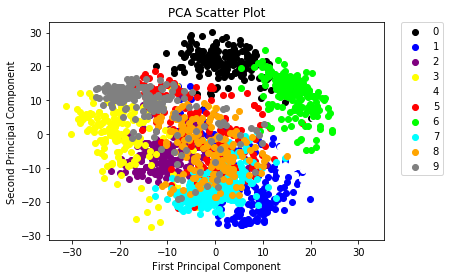

In [61]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i] #select only those data points for which the label equals the index of the current run of the loop
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

### Preprocessing data

In [64]:
# Apply `scale()` to the `digits` data for data normalization
data = scale(digits.data) #normalize: shift distribution of each attribute to have mean 0 and stdev 1

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, 
                                                                               digits.target, 
                                                                               digits.images, 
                                                                               test_size=0.25, # 75% training set, 25% test set
                                                                               random_state=42) #split always the same

# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

# Inspect `y_train`
print(len(y_train))

1347
64
1347


### Clustering

In [67]:
# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)
#optionally include n_init to determine how many different centroid configurations the algorithm will try

# Fit the training data `X_train`to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Argument `n_clusters` not only indicates the number of clusters or groups you want your data to form, but also the number of centroids to generate. Remember that a cluster centroid is the middle of a cluster.


A disadventage of KMeans is that the initial set of cluster centers that you give up can have a significant effect on the clusters that are eventually found.


Usually, you try to deal with this effect by trying several initial sets in multiple runs and by selecting the set of clusters with the minimum sum of the squared errors (SSE). In other words, you want to minimize the distance of each point in the cluster to the mean or centroid of that cluster.


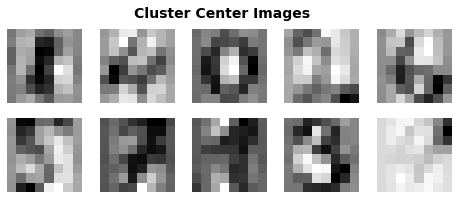

In [68]:
# Figure size in inches
fig_result = plt.figure(figsize=(8, 3))

# Add title
fig_result.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig_result.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

Other visualization example [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)

### Predict labels of test set

In [69]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
print(clf.cluster_centers_.shape)

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]
(10, 64)


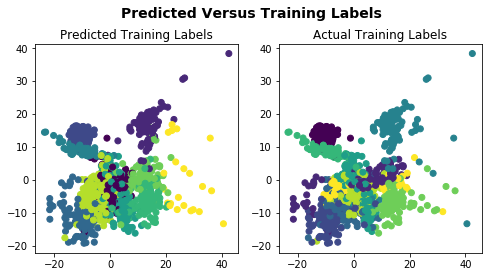

In [70]:
# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train) #Isomap is a non-linear reduction method, to reduce dimensions (similar to linear PCA)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

### Evaluation of model

In [76]:
# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))

# only digit 5 was classified correct in 41 cases, digit 8 in 11 instances.

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


In [75]:
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      metrics.homogeneity_score(y_test, y_pred),
      metrics.completeness_score(y_test, y_pred),
      metrics.v_measure_score(y_test, y_pred),
      metrics.adjusted_rand_score(y_test, y_pred),
      metrics.adjusted_mutual_info_score(y_test, y_pred),
      metrics.silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo   compl  v-meas     ARI AMI  silhouette
54276   0.688   0.733   0.710   0.567   0.674    0.146


D:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


You’ll see that there are quite some metrics to consider:

* The homogeneity score tells you to what extent all of the clusters contain only data points which are members of a single class.
* The completeness score measures the extent to which all of the data points that are members of a given class are also elements of the same cluster.
* The V-measure score is the harmonic mean between homogeneity and completeness.
* The adjusted Rand score measures the similarity between two clusterings and considers all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
* The Adjusted Mutual Info (AMI) score is used to compare clusters. It measures the similarity between the data points that are in the clusterings, accounting for chance groupings and takes a maximum value of 1 when clusterings are equivalent.
* The silhouette score measures how similar an object is to its own cluster compared to other clusters. The silhouette scores range from -1 to 1, where a higher value indicates that the object is better matched to its own cluster and worse matched to neighboring clusters. If many points have a high value, the clustering configuration is good.


### Consider other model: Support Vector

In [82]:
# Split the data into training and test sets
# this time without normalizing the data, but digits.data directly
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, 
                                                                               digits.target, 
                                                                               digits.images, 
                                                                               test_size=0.25, 
                                                                               random_state=42)

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

svc_model.score(X_test, y_test)

0.9822222222222222

In [81]:
#maybe do grid search now?
# Split the `digits` data into two equal sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [80]:
# Apply the classifier to the test data, and view the accuracy score
clf.score(X_test, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.9911111111111112

You see that in the SVM classifier, the penalty parameter C of the error term is specified at 100.. Lastly, you see that the kernel has been explicitly specified as a linear one. The kernelargument specifies the kernel type that you’re going to use in the algorithm and by default, this is rbf. In other cases, you can specify others such as linear, poly, …

But what is a kernel exactly?

A kernel is a similarity function, which is used to compute the similarity between the training data points. When you provide a kernel to an algorithm, together with the training data and the labels, you will get a classifier, as is the case here. You will have trained a model that assigns new unseen objects into a particular category. For the SVM, you will typically try to divide your data points linearly.

However, the grid search tells you that an rbf kernel would’ve worked better. The penalty parameter and the gamma were specified correctly.

In [83]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test)

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 9 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 2 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 

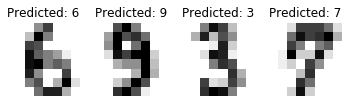

In [84]:
# Assign the predicted values to `predicted`
predicted = svc_model.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

### SVM model performance

In [85]:
# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix of `y_test` and `predicted`
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  0  0  1]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0

Precision: positive prediction value, TP / (TP + FP). How many has it predicted correctly being positive of all that the model has marked being positive?


Recall: true positive rate, TP / (TP + FN). How many has the model found being positive, how many should it have found?


Accuracy: fraction correct, (TP + TN) / (TP + FP + TN + FN). Will fail as a metric if dataset is unbalanced.

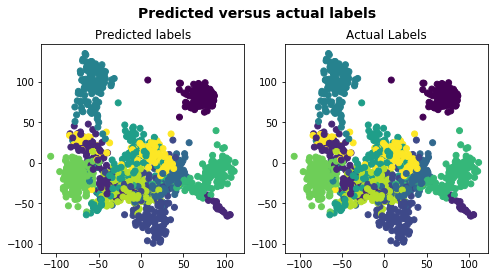

In [86]:
# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_model.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()